In [214]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras
from matplotlib import pyplot as plt
import seaborn as sns
from tensorflow.keras import regularizers

In [42]:
np.set_printoptions(precision=3, suppress=True)
print(tf.__version__)

2.18.0


In [65]:
columns_names = ['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin','car name']
raw_dataset = pd.read_csv('auto-mpg.data',names = columns_names, na_values = '?', comment = '\t', sep = ' ',skipinitialspace=True)
raw_dataset.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,NaN
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,NaN
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,NaN
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,NaN
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,NaN


In [66]:
dataset = raw_dataset.copy()
dataset.drop(columns=['car name'], inplace=True)
dataset.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [67]:
print('datset shape is: ',dataset.shape)

print('\n\n datset info : ')
# dataset.drop(columns=['car name'],inplace = True)
dataset.info()

print('\n\n NaN values in dataset are: ')
print(dataset.isna().sum())

dataset = dataset.dropna()
print('\n\n NaN values in dataset are: ')
print(dataset.isna().sum())





datset shape is:  (398, 8)


 datset info : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


 NaN values in dataset are: 
mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
dtype: int64


 NaN values in dataset are: 
mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
dtype: 

In [68]:
dataset['origin'].unique()
dataset['origin'].nunique()

dataset['origin'] = dataset['origin'].map({
    1:'USA',
    2:'Europe',
    3:'Japan'
})

dataset.info()



<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    float64
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 27.6+ KB


In [69]:
dataset = pd.get_dummies(dataset, columns = ['origin'], prefix='', prefix_sep='').astype(int)
dataset.columns


Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'Europe', 'Japan', 'USA'],
      dtype='object')

In [70]:
dataset.head()  

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,Europe,Japan,USA
0,18,8,307,130,3504,12,70,0,0,1
1,15,8,350,165,3693,11,70,0,0,1
2,18,8,318,150,3436,11,70,0,0,1
3,16,8,304,150,3433,12,70,0,0,1
4,17,8,302,140,3449,10,70,0,0,1


In [73]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)


print('train dataset shape is: ',train_dataset.shape)
print('test dataset shape is: ',test_dataset.shape)

train dataset shape is:  (314, 10)
test dataset shape is:  (78, 10)


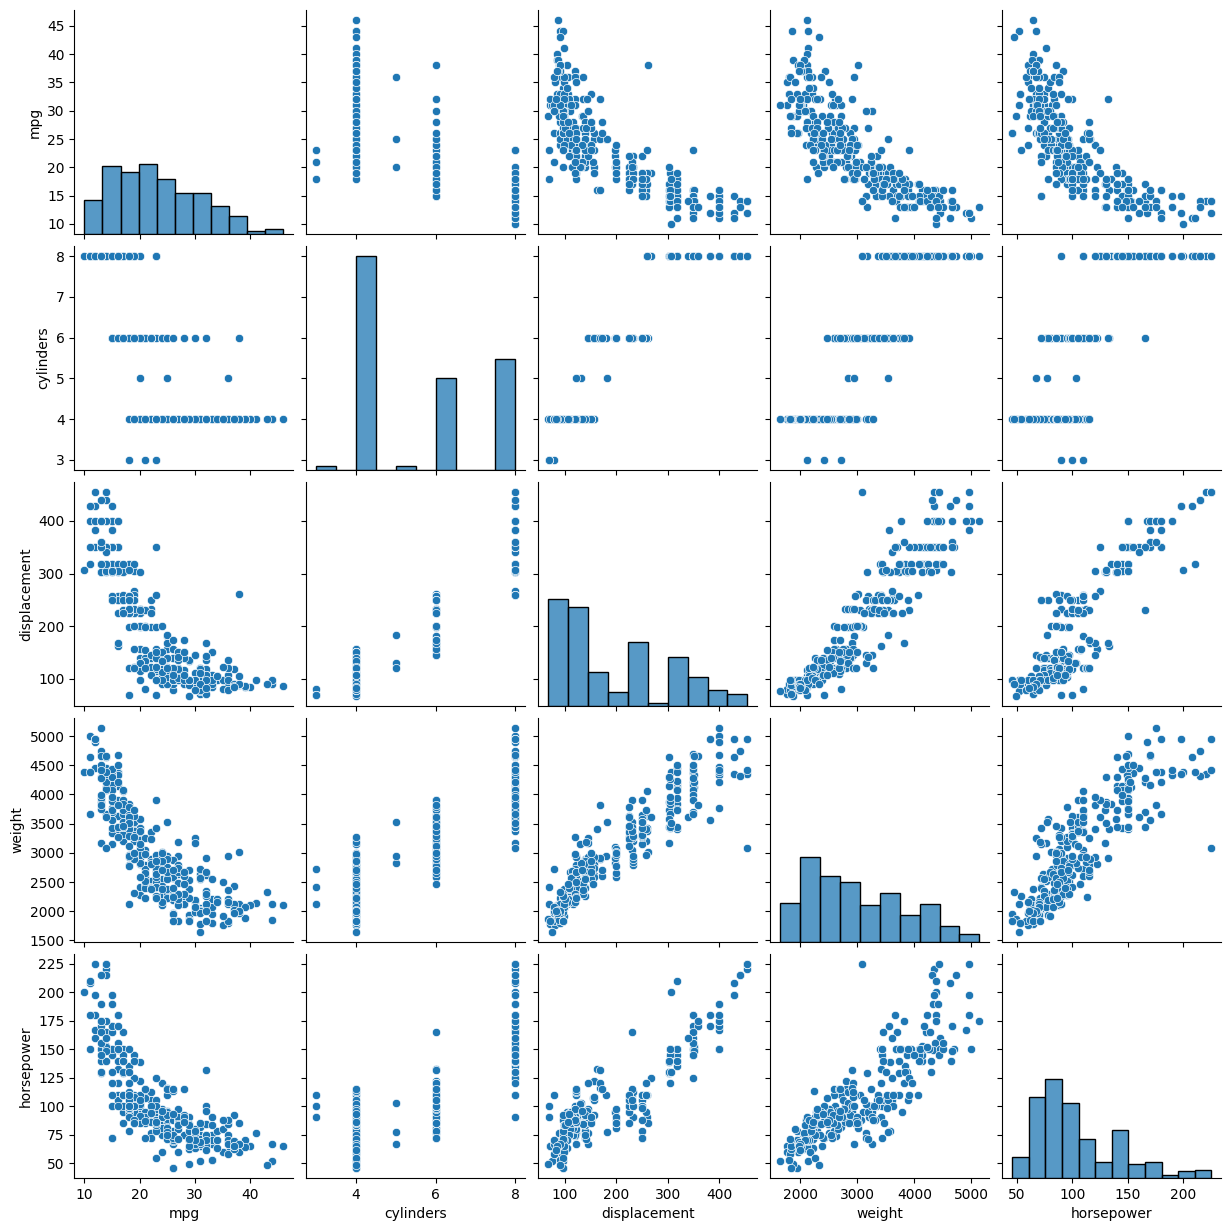

In [130]:
train_dataset.columns
sns.pairplot(train_dataset[['mpg','cylinders','displacement','weight','horsepower']])

In [80]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mpg,314.0,23.146497,7.665795,10.0,17.00,22.0,28.75,46.0
cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
acceleration,314.0,15.197452,2.774690,8.0,13.00,15.0,17.00,24.0
model year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0


In [119]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('mpg')
test_labels = test_features.pop('mpg')
train_labels.head()

146    28
282    22
69     12
378    38
331    33
Name: mpg, dtype: int64

In [83]:
train_dataset.describe().transpose()[['mean','std']]

,mean,std
mpg,23.146497,7.665795
cylinders,5.477707,1.699788
displacement,195.318471,104.331589
horsepower,104.869427,38.096214
weight,2990.251592,843.898596
acceleration,15.197452,2.774690
model year,75.898089,3.675642
Europe,0.178344,0.383413
Japan,0.197452,0.398712
USA,0.624204,0.485101


In [131]:
#normalization
normalizer = keras.layers.Normalization(axis=-1)
#adapt() method is used to calculate the mean and variance and stores it in the normalizer, which will be used to normalize the data 
normalizer.adapt(np.array(train_features))

In [132]:
print(normalizer.mean.numpy())
print(np.sqrt(normalizer.variance.numpy()))

[[   5.478  195.318  104.869 2990.252   15.197   75.898    0.178    0.197
     0.624]]
[[  1.697 104.165  38.036 842.554   2.77    3.67    0.383   0.398   0.484]]


In [133]:
first = np.array(train_features[:1])
print('First example is:',first)
normalizer(first)

First example is: [[   4   90   75 2125   14   74    0    0    1]]


<tf.Tensor: shape=(1, 9), dtype=float32, numpy=
array([[-0.871, -1.011, -0.785, -1.027, -0.432, -0.517, -0.466, -0.496,
         0.776]], dtype=float32)>

In [135]:
##linear regression with one variable
horsepower = np.array(train_features['horsepower'])
print(horsepower.shape)
horsepower_normalizer = layers.Normalization(input_shape = [1,], axis = None)
horsepower_normalizer.adapt(horsepower)

print(horsepower_normalizer)

(314,)
<Normalization name=normalization_4, built=True>


d:\linear_regression\.venv\lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
horsepower_model = keras.Sequential([
    horsepower_normalizer,
    #output layer that outputs only one value which is mpg
    layers.Dense(units=1)
])

horsepower_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_1 (Normalization) │ (None, 1)              │             3 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5 (24.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 3 (16.00 B)

In [102]:
horsepower_model.predict(horsepower[:10])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


array([[ 1.216],
       [ 0.687],
       [-2.245],
       [ 1.705],
       [ 1.542],
       [ 0.605],
       [ 1.827],
       [ 1.542],
       [ 0.402],
       [ 0.687]], dtype=float32)

In [104]:
horsepower_model.compile(
    optimizer = keras.optimizers.Adam(learning_rate=0.1),
    loss = 'mean_absolute_error'
)

In [107]:
%%time
history = horsepower_model.fit(
    train_features['horsepower'],
    train_labels,
    epochs = 100,
    verbose = 1,
    validation_split = 0.2
)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.6213 - val_loss: 4.2313
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.7438 - val_loss: 4.2464
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.7255 - val_loss: 4.2202
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.6831 - val_loss: 4.2476
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.7145 - val_loss: 4.2564
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.6793 - val_loss: 4.2408
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.9298 - val_loss: 4.2072
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.9624 - val_loss: 4.2164
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.0492 - val_loss: 4.2265
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.7739 - val_loss: 4.2421
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.6081 - val_loss: 4.2407
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.6836 - val_loss: 4.2268
E

In [111]:
print(type(history.history))
print(history.history)
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

<class 'dict'>
{'loss': [3.739617347717285, 3.739997148513794, 3.7442197799682617, 3.7397241592407227, 3.7432007789611816, 3.740039825439453, 3.7416093349456787, 3.7425851821899414, 3.7400996685028076, 3.7395825386047363, 3.741589307785034, 3.7411534786224365, 3.7404494285583496, 3.738377809524536, 3.742494821548462, 3.7399508953094482, 3.741513729095459, 3.7414515018463135, 3.7415599822998047, 3.7412121295928955, 3.7425286769866943, 3.742037773132324, 3.7408816814422607, 3.745370864868164, 3.7412993907928467, 3.740811586380005, 3.7396774291992188, 3.742755651473999, 3.7411458492279053, 3.7404446601867676, 3.74079966545105, 3.7404067516326904, 3.7469372749328613, 3.742269515991211, 3.7413077354431152, 3.7425506114959717, 3.7409422397613525, 3.7419211864471436, 3.740917682647705, 3.743499517440796, 3.7429325580596924, 3.7388784885406494, 3.740814447402954, 3.7458622455596924, 3.7424769401550293, 3.7407617568969727, 3.7405192852020264, 3.7450573444366455, 3.743893623352051, 3.73831963539

,loss,val_loss,epoch
95,3.739640,4.240956,95
96,3.740254,4.237463,96
97,3.738235,4.248549,97
98,3.741106,4.258444,98
99,3.741015,4.241200,99


In [162]:
training_loss = history.history['loss']
val_loss = history.history['val_loss']

def plot_history(trainig_loss, val_loss):
    plt.plot(training_loss, label='training loss')
    plt.plot(val_loss, label='validation loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

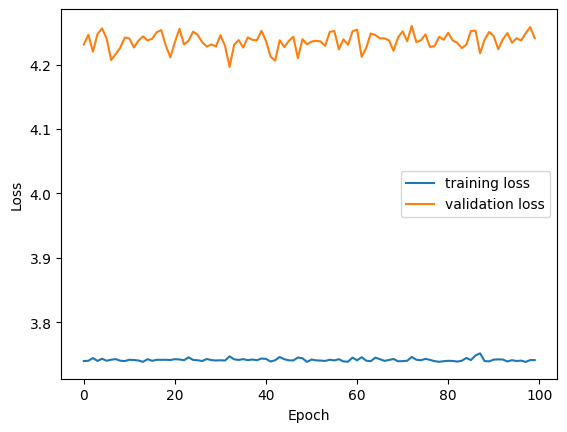

In [118]:
plot_history(training_loss,val_loss)

In [120]:
test_results = {}
test_results['horsepower_model'] = horsepower_model.evaluate(
    test_features['horsepower'],
    test_labels,
)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.5256


In [125]:
x = tf.linspace(0.0, 250, 251)
print(x.shape)
y = horsepower_model.predict(x)


(251,)
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [128]:
def plot_horsepower(x, y):
  plt.scatter(train_features['horsepower'], train_labels, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('Horsepower')
  plt.ylabel('MPG')
  plt.legend()

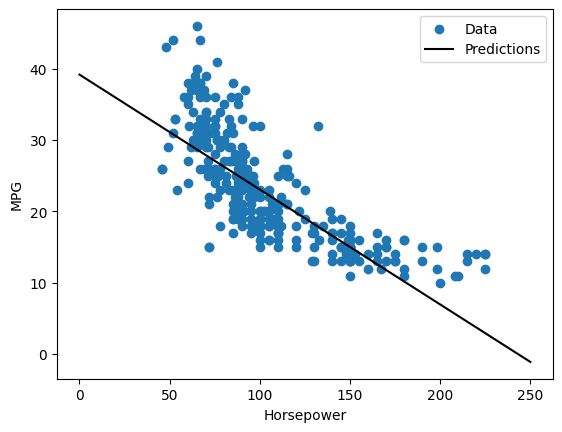

In [129]:
plot_horsepower(x,y)

In [149]:
#linear model with multiple inputs
linear_model= keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

linear_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_2 (Normalization) │ (None, 9)              │            19 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19 (80.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 19 (80.00 B)

In [150]:
loss = keras.losses.MeanAbsoluteError()
opt = keras.optimizers.Adam(learning_rate=0.3)
linear_model.compile(optimizer=opt, loss=loss)

In [151]:
history = linear_model.fit(
    train_features,
    train_labels,
    epochs=100,
    verbose=1,
    validation_split=0.2
)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 22.3777 - val_loss: 21.3138
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 21.1018 - val_loss: 19.0637
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 17.8804 - val_loss: 17.0906
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 15.4520 - val_loss: 14.6516
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 12.5061 - val_loss: 12.4280
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 10.4719 - val_loss: 10.2635
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.5476 - val_loss: 8.1842
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.1037 - val_loss: 6.0519
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.2262 - val_loss: 4.3883
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.3046 - val_loss: 3.0762
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.7584 - val_loss: 2.6796
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.5597 - val_l

In [164]:
test_results['linear_model']=linear_model.evaluate(
    test_features,
    test_labels
)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.6446 


In [147]:
linear_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_2 (Normalization) │ (None, 9)              │            19 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            10 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51 (212.00 B)

 Trainable params: 10 (40.00 B)

 Non-trainable params: 19 (80.00 B)

 Optimizer params: 22 (92.00 B)

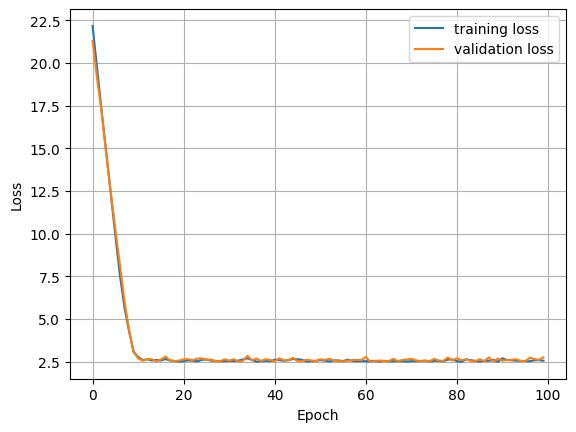

In [163]:
history.history.keys()
hist = pd.DataFrame(history.history)
hist.head()

plot_history(history.history['loss'], history.history['val_loss'])

In [165]:
test_results

{'horsepower_model': 3.650681734085083, 'linear_model': 2.794243335723877}

In [243]:
def build_and_compile_model(normalizer):
    model = keras.Sequential([
        normalizer,
        layers.Dense(128, activation='relu',kernel_regularizer=regularizers.l1(0.001)),
        # layers.Dropout(0.5),
        layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l1(0.001)),
        # layers.Dropout(0.5),
        layers.Dense(1)
    ])

    loss = keras.losses.MeanAbsoluteError()

    # lr_schedule = keras.optimizers.schedules.InverseTimeDecay(
    #     0.1,
    #     decay_steps=10,
    #     decay_rate=0.01,
    #     staircase=False
    # )

    opt = keras.optimizers.Adam(0.1)
    model.compile(optimizer=opt, loss=loss)

    return model

In [234]:
dnn_horespower_model = build_and_compile_model(horsepower_normalizer)
dnn_horespower_model.summary()

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_4 (Normalization) │ (None, 1)              │             3 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 128)            │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,900 (66.02 KB)

 Trainable params: 16,897 (66.00 KB)

 Non-trainable params: 3 (16.00 B)

In [235]:
history = dnn_horespower_model.fit(
    train_features['horsepower'],
    train_labels,
    epochs = 100,
    verbose = 1,
    validation_split = 0.2
)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 15.1299 - val_loss: 5.0288
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.5868 - val_loss: 4.8510
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.5557 - val_loss: 4.9755
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.3654 - val_loss: 4.0083
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.4249 - val_loss: 3.9801
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.9404 - val_loss: 3.9788
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.5774 - val_loss: 3.9670
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.5856 - val_loss: 3.9557
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.8662 - val_loss: 4.7844
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.8549 - val_loss: 4.2855
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.0940 - val_loss: 4.2141
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.0076 - val_loss: 4.1340

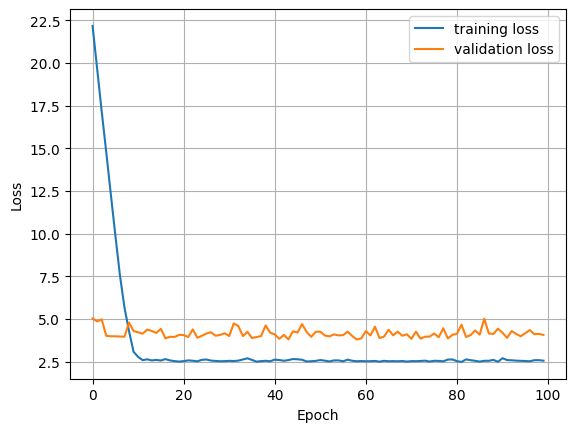

In [236]:
plot_history(history.history['loss'], history.history['val_loss'])

In [237]:
x = tf.linspace(0.0, 250, 251)
y = dnn_horespower_model.predict(x)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


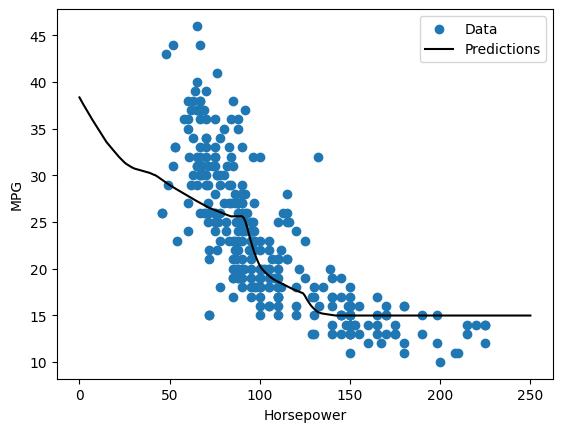

In [238]:
plot_horsepower(x, y)

In [239]:
test_results['dnn_horespower_model'] = dnn_horespower_model.evaluate(
    test_features['horsepower'],
    test_labels
)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.4218 


In [244]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_2 (Normalization) │ (None, 9)              │            19 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19 (80.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 19 (80.00 B)

In [245]:
history = dnn_model.fit(
    train_features,
    train_labels,
    epochs = 100,
    verbose = 1,
    validation_split = 0.2
)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 19.7856 - val_loss: 15.1865
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 13.7211 - val_loss: 9.3036
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.9920 - val_loss: 8.2648
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.7329 - val_loss: 6.7227
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.2311 - val_loss: 5.7631
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.0943 - val_loss: 7.3555
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.0791 - val_loss: 6.4563
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.4655 - val_loss: 4.6291
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.2292 - val_loss: 5.2868
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.1141 - val_loss: 4.5946
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.9281 - val_loss: 3.6924
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.7121 - val_loss: 3.99

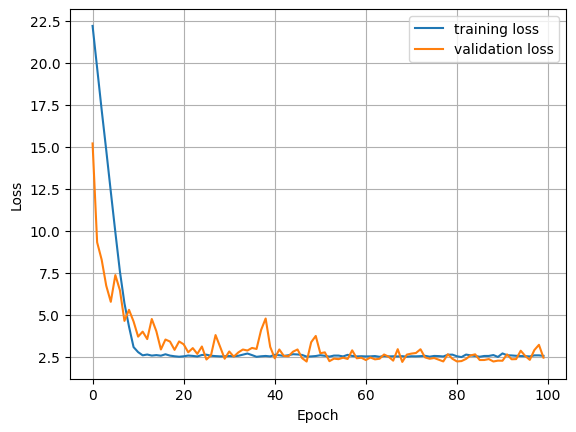

In [246]:
plot_history(history.history['loss'], history.history['val_loss'])

In [247]:
test_results['dnn_model'] = dnn_model.evaluate(
    test_features,
    test_labels
)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9339 


In [184]:
performance = pd.DataFrame(test_results, index=['Mean Absolute Error [MPG]']).T
performance

,Mean Absolute Error [MPG]
horsepower_model,3.650682
linear_model,2.794243
dnn_horespower_model,3.554448
dnn_model,1.845981


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


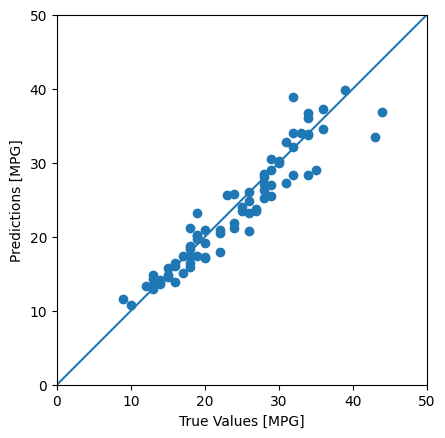

In [189]:
test_predictions = dnn_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

Text(0, 0.5, 'Count')

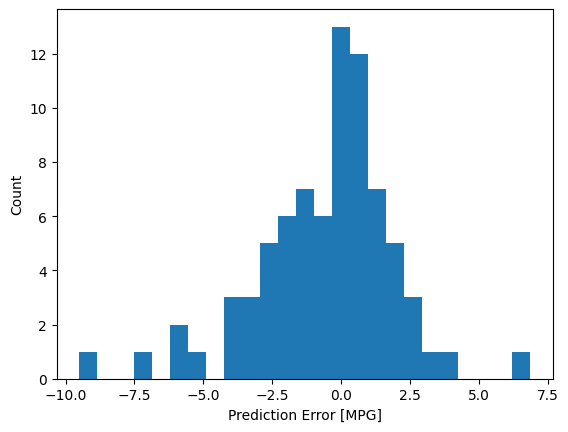

In [193]:
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [MPG]')
plt.ylabel('Count')

In [ ]:
dnn_model.save('dnn_model.keras')